In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [9]:
df = pd.DataFrame.from_csv(
    "../param-sweep-results.csv",
    index_col = None,
    header = None
)
df.columns = ["accuracy-avg", "accuracy-std",
        "precision-avg", "precision-std",
        "recall-avg", "recall-std",
        "pitch_cont", "max_gap", "amp_thresh", "dev_thresh"]

In [12]:
def f_beta(precision, recall, beta):
    return (1.0 + beta**2.0) * (precision * recall) / ((beta**2.0 * precision) + recall)

In [13]:
df_fbeta = f_beta(df['precision-avg'], df['recall-avg'], 10)

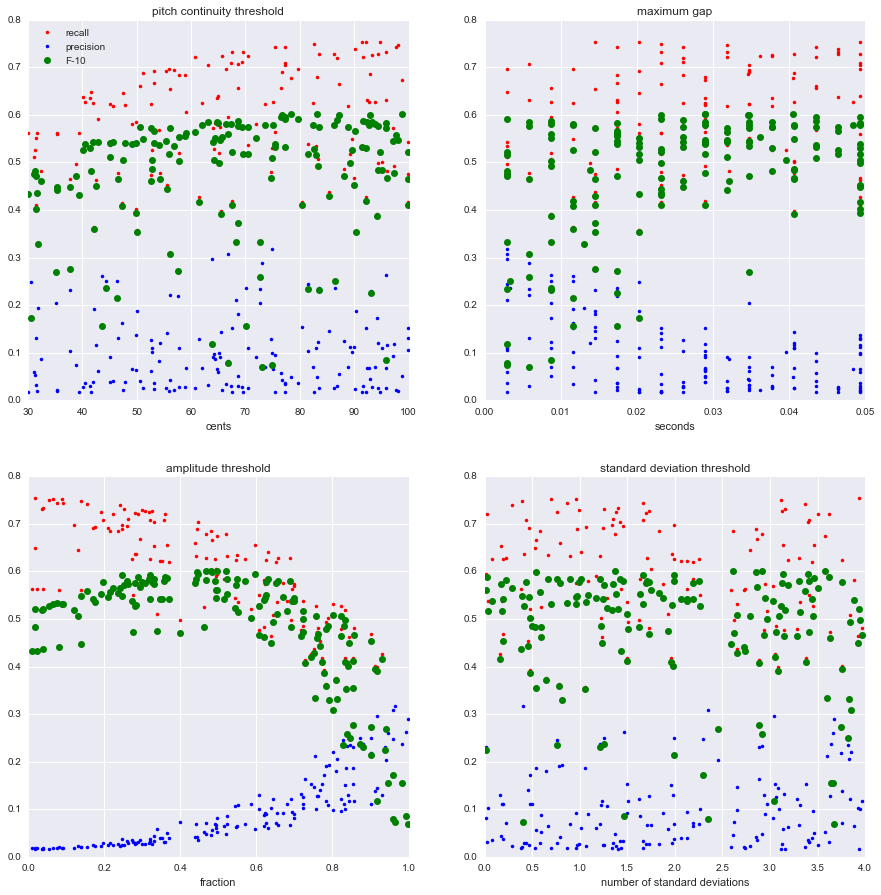

In [17]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('pitch continuity threshold')
plt.plot(df['pitch_cont'], df['recall-avg'], 'r.', label='recall')
plt.plot(df['pitch_cont'], df['precision-avg'], 'b.', label='precision')
plt.plot(df['pitch_cont'], df_fbeta, 'go', label='F-10')
plt.legend(loc=2)
plt.xlabel('cents')

plt.subplot(2, 2, 2)
plt.title('maximum gap')
plt.plot(df['max_gap'], df['recall-avg'], 'r.')
plt.plot(df['max_gap'], df['precision-avg'], 'b.')
plt.plot(df['max_gap'], df_fbeta, 'go')
plt.xlabel('seconds')

plt.subplot(2, 2, 3)
plt.title('amplitude threshold')
plt.plot(df['amp_thresh'], df['recall-avg'], 'r.')
plt.plot(df['amp_thresh'], df['precision-avg'], 'b.')
plt.plot(df['amp_thresh'], df_fbeta, 'go')
plt.xlabel('fraction')


plt.subplot(2, 2, 4)
plt.title('standard deviation threshold')
plt.plot(df['dev_thresh'], df['recall-avg'], 'r.')
plt.plot(df['dev_thresh'], df['precision-avg'], 'b.')
plt.plot(df['dev_thresh'], df_fbeta, 'go')
plt.xlabel('number of standard deviations')

plt.savefig('peak-streaming-param-sweep.pdf', ext='pdf')

In [20]:
df['recall-avg'].describe()

count    155.000000
mean       0.539639
std        0.169826
min        0.068363
25%        0.464120
50%        0.572637
75%        0.678736
max        0.753862
Name: recall-avg, dtype: float64